# BDAT1004 Problem Set 3
## Name: Pranali Karande
## Student id: 200533569

### Question 1:

In [1]:
#Step 1:
import pandas as pd
import numpy as np

In [4]:
#step 2 & 3: 
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
#step 4:Discover what is the mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
#step 5: Discover the Male ratio per occupation and sort it from the most to the least
male_ratio = users.groupby('occupation').apply(lambda x: sum(x['gender'] == 'M') / len(x))
male_ratio.sort_values(ascending=False, inplace=True)
male_ratio

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [10]:
#step 6: For each occupation, calculate the minimum and maximum ages
age_range = users.groupby('occupation')['age'].agg(['min', 'max']).add_suffix('(Age)')
age_range

,min(Age),max(Age)
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [17]:
#Step 7: For each combination of occupation and sex, calculate the mean age
mean_age = users.groupby(['occupation', 'gender']).agg({'age': 'mean'})
mean_age

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [19]:
#Step 8: For each occupation present the percentage of women and men
num = users.groupby(['occupation', 'gender'])['user_id'].sum().rename("count")
num/num.groupby(level=0).sum()*100

occupation     gender
administrator  F          46.943751
               M          53.056249
artist         F          44.400537
               M          55.599463
doctor         M         100.000000
educator       F          26.654793
               M          73.345207
engineer       F           5.275724
               M          94.724276
entertainment  F          21.775544
               M          78.224456
executive      F           8.280302
               M          91.719698
healthcare     F          77.938427
               M          22.061573
homemaker      F          71.041599
               M          28.958401
lawyer         F          13.228127
               M          86.771873
librarian      F          52.486299
               M          47.513701
marketing      F          38.944039
               M          61.055961
none           F          62.899337
               M          37.100663
other          F          29.985786
               M          70.014214
progra

### Question 2

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Step 2. Import the dataset & Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [3]:
#Step 4. Select only the Goal column
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [4]:
#Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [5]:
#Step 6. What is the number of columns in the dataset?
num_cols = euro12.shape[1]

print("The number of columns in the dataset is:", num_cols)

The number of columns in the dataset is: 35


In [7]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [9]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
sorted_discipline = discipline.sort_values(["Red Cards", "Yellow Cards"], ascending=[False, False])
sorted_discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [10]:
#Step 9. Calculate the mean Yellow Cards given per Team
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [11]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [12]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [13]:
#Step 12. Select the first 7 columns
euro12.iloc[ : , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [14]:
#Step 13. Select all columns except the last 3
euro12.iloc[ : , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [15]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3:

In [17]:
#Step 1. Import the necessary libraries
import pandas as pd
import random
import numpy as np

In [19]:
#Step 2. Create 3 differents Series, each of length 100
np.random.seed(42)

series1 = pd.Series(np.random.randint(low=1, high=5, size=100))
series2 = pd.Series(np.random.randint(low=1, high=4, size=100))
series3 = pd.Series(np.random.randint(low=10000, high=30001, size=100))
series1
series2
series3

0     23931
1     13627
2     26157
3     20173
4     28047
      ...  
95    11154
96    14499
97    16295
98    22183
99    22874
Length: 100, dtype: int32

In [20]:
#Step 3. Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)
df

,0,1,2
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [21]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [26]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
bigcolumn


,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


In [33]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
print(len(bigcolumn))
print('Yes, that is accurate.The length of the Series object obtained by vertically concatenating the three Series objects, each of which is 100, is 300.')


300
Yes, that is accurate.The length of the Series object obtained by vertically concatenating the three Series objects, each of which is 100, is 300.


In [30]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
print('Reindexing the DataFrame')
bigcolumn


Reindexing the DataFrame


,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


### Question 4

In [133]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

In [150]:
#Step 2 & step 3 
data = pd.read_csv("C:/Users/prana/Downloads/wind.txt", sep = "\s+", parse_dates = [[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [153]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def century(x):
    if x.year > 1989:
        year = x.year - 100 
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)


data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [155]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [156]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [159]:
#Step 7. Compute how many non-missing values there are in total
print (f'Non-missing values in each location are')
data.notnull().sum()

Non-missing values in each location are


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [160]:
print (f'Total number of non-missing values is:', data.notnull().sum().sum())

Total number of non-missing values is: 78857


In [161]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the time
mean_wind_speed = data.mean().mean()
print (f"The mean windspeeds of the windspeeds over all the locations and all the times is ", mean_wind_speed)

The mean windspeeds of the windspeeds over all the locations and all the times is  10.227982360836924


In [162]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
loc_stats


,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [127]:
loc_stats = data.apply(stats)
loc_stats

,value
Min,1.000000
Max,29965.000000
Mean,6679.176667
Std,10043.398725


In [164]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
statistics = pd.DataFrame()

statistics['min'] = data.min(axis = 1)
statistics['max'] = data.max(axis = 1)  
statistics['mean'] = data.mean(axis = 1)
statistics['std'] = data.std(axis = 1) 

statistics.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [166]:
#Step 11:Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [167]:
#Step 12. Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('Y').mean()
yearly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [168]:
#Step 13. Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [169]:
#Step 14. Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [170]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
data.groupby(lambda d: (d.month, d.year)).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
"(1, 1961)",14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
"(1, 1962)",14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
"(1, 1963)",14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
"(1, 1964)",12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
"(1, 1965)",15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
...,...,...,...,...,...,...,...,...,...,...,...,...
"(12, 1974)",18.511290,17.805806,14.773871,9.734839,16.944194,10.153871,16.602903,15.034194,14.883548,12.915161,18.803548,24.124194
"(12, 1975)",11.655484,8.686774,11.217742,4.478387,6.628710,4.178065,10.351290,6.176129,8.401935,7.342903,12.028710,18.689032
"(12, 1976)",11.962258,10.086774,10.474516,3.383871,7.645484,6.148387,8.034516,4.500000,5.952258,6.147742,7.814839,14.346774
"(12, 1977)",14.751935,12.744839,13.469677,6.592258,11.247742,9.466774,13.231613,10.703871,10.401613,9.415484,13.237419,19.299677


### Question 5:

In [55]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [56]:
#Step 2. Import the dataset from this address & Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [58]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [59]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [60]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [61]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [62]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [63]:
#Step 9. Which was the most-ordered item?
product = chipo.groupby('item_name')
product = product.sum()
product = product.sort_values(['quantity'], ascending=False)
product.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [64]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [65]:
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [66]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [67]:
#Step 12. How many items were ordered in total?
chipo.quantity.sum()

4972

In [68]:
#Step 13.• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type
chipo.item_price.dtype

dtype('O')

In [69]:
chgType = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(chgType)

In [70]:
chipo.item_price.dtype

dtype('float64')

In [73]:
#Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('The total revenue was: ' + str(np.round(revenue,2)))

The total revenue was: 39237.02


In [74]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [75]:
#Step 16. What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [76]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

### Question 6:

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("C:/Users/prana/OneDrive/Desktop/BDAT/Data Programming/datasets/us-marriages-divorces-1867-2014.csv")

<Figure size 640x480 with 0 Axes>

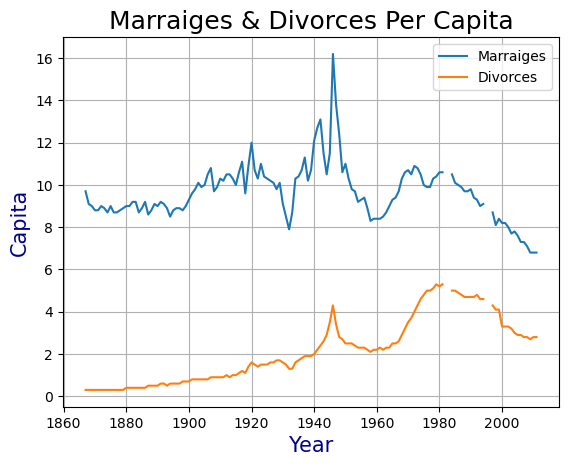

In [80]:
plt.figure()
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.title('Marraiges & Divorces Per Capita', color = 'Black', fontsize = 18)
plt.xlabel('Year', color = 'DarkBlue', fontsize = 15)
plt.ylabel('Capita', color = 'DarkBlue', fontsize = 15)
plt.grid(True)
plt.show()

### Question 7:

In [83]:
x = data.loc[data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
x

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


C:\Users\prana\AppData\Local\Temp\ipykernel_23944\2976720470.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


([<matplotlib.axis.XTick at 0x16c548b02b0>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

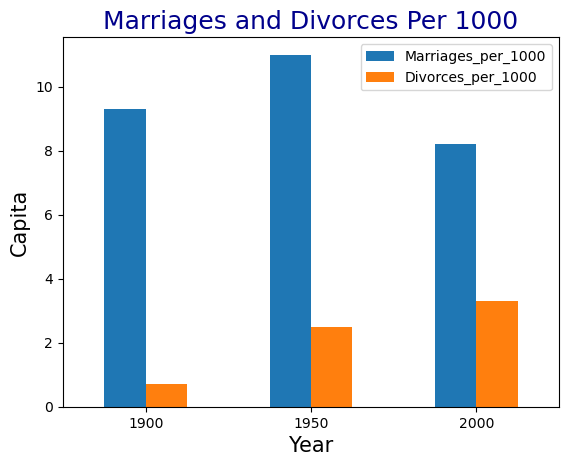

In [85]:
x[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'DarkBlue', fontsize = 18)
plt.xlabel('Year', color = 'Black', fontsize = 15)
plt.ylabel('Capita', color = 'Black', fontsize = 15)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

### Question 8:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("C:/Users/prana/OneDrive/Desktop/BDAT/Data Programming/datasets/actor_kill_counts.csv")

In [91]:
y = data.sort_values("Count", ascending = True)

Text(0, 0.5, 'Actor')

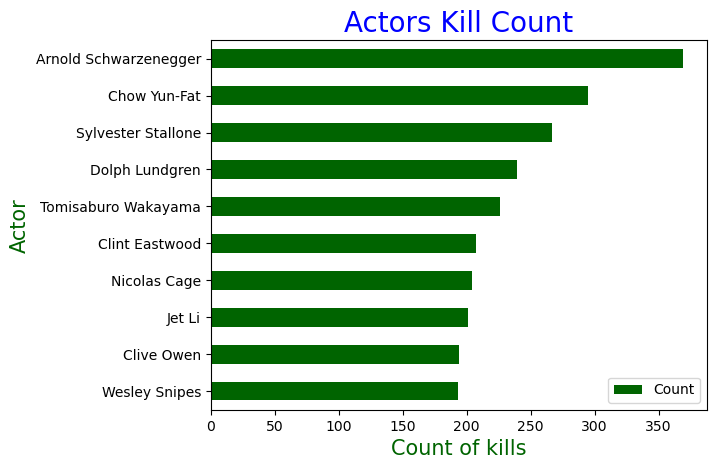

In [92]:
y.plot.barh(x='Actor', y='Count', color = 'DarkGreen')
plt.title('Actors Kill Count', fontsize=20, color = 'Blue')
plt.xlabel('Count of kills', color = 'DarkGreen', fontsize = 15)
plt.ylabel('Actor', color = 'DarkGreen', fontsize = 15)

### Question 9: 

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
data = pd.read_csv("C:/Users/prana/OneDrive/Desktop/BDAT/Data Programming/datasets/roman-emperor-reigns.csv")

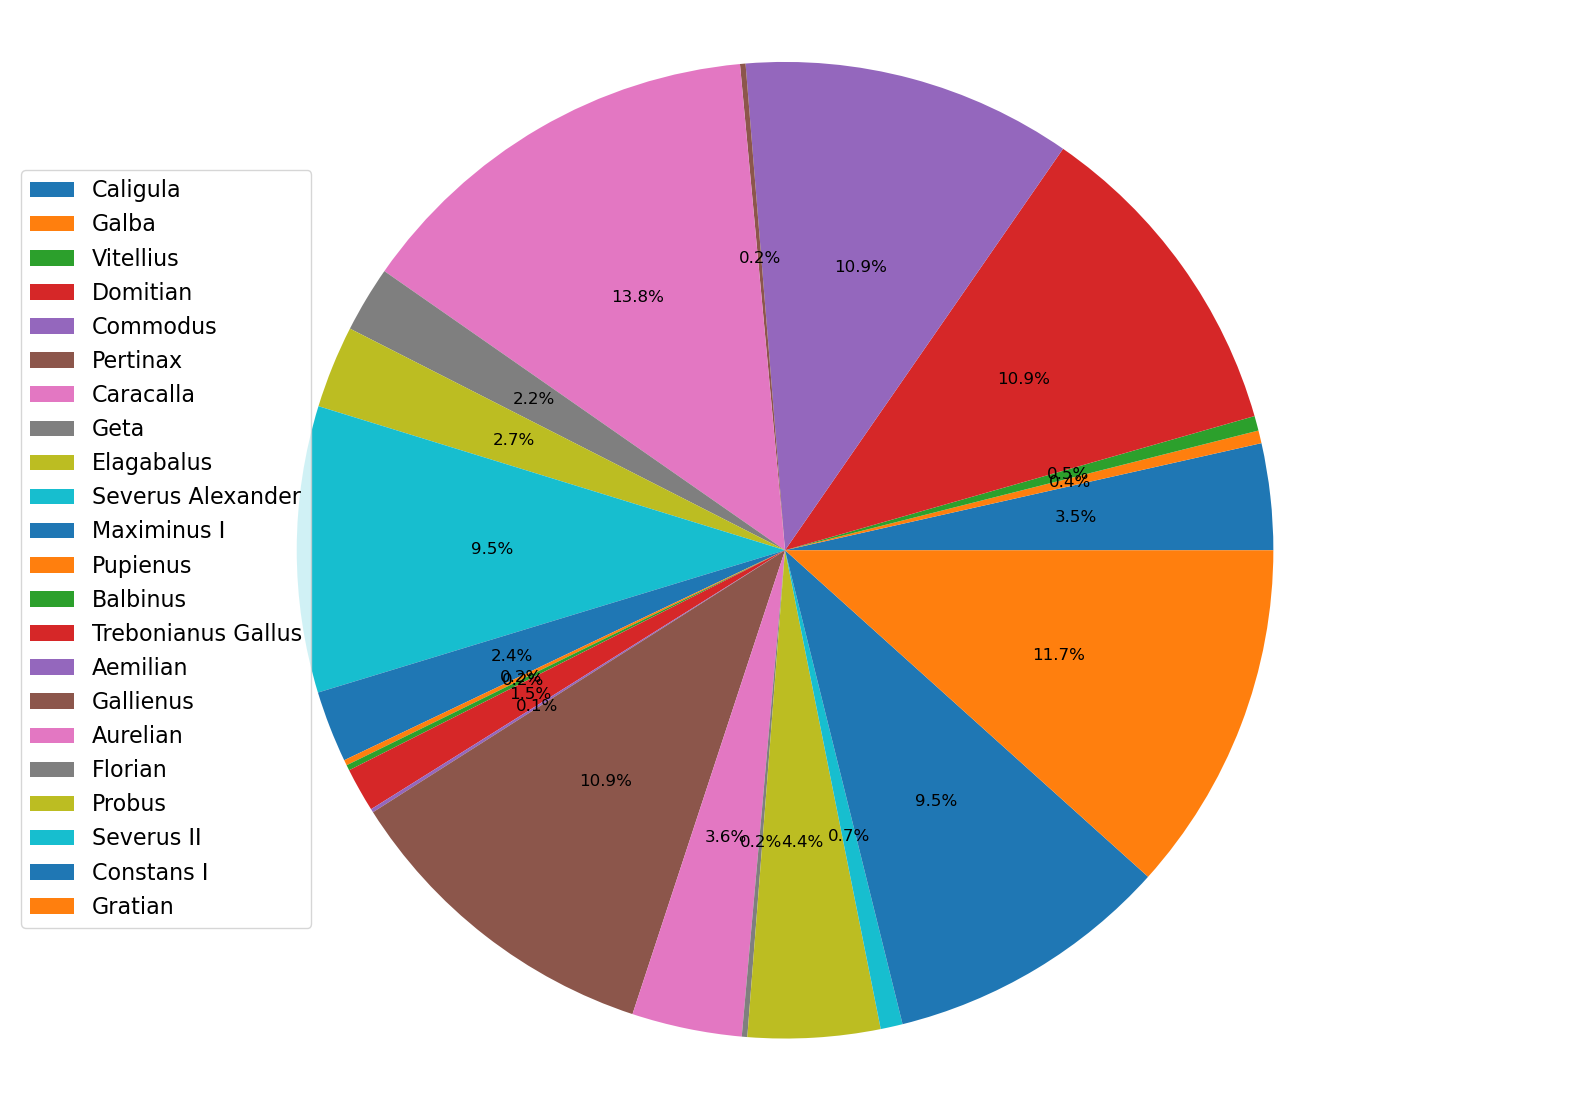

In [149]:
assassinated_df = data[data.Cause_of_Death == 'Assassinated']

labels = assassinated_df.Emperor 
sizes = assassinated_df.Length_of_Reign
fig, ax = plt.subplots(figsize=(20, 14))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 12})
plt.axis('equal')
plt.legend( labels, loc='center left', fontsize = 16)
plt.show()

### Question 10:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv("C:/Users/prana/OneDrive/Desktop/BDAT/Data Programming/datasets/arcade-revenue-vs-cs-doctorates.csv")

Text(0, 0.5, 'CS Doctorates Awarded')

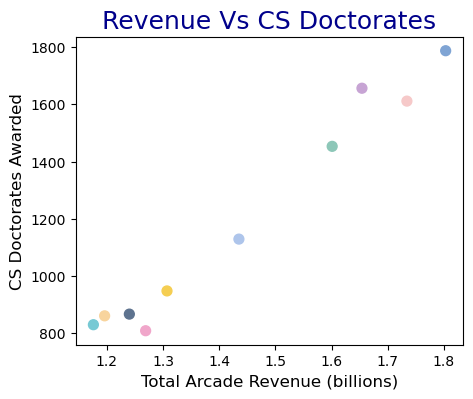

In [114]:
%matplotlib inline

colours = ['#F8D49D', '#77C9D4', '#F0A6CA', '#5E738F', '#F5CE52', '#AEC5EB', '#8DC7B8', '#C7A4D4', '#7FA4D4', '#F6C9C9']

data.plot.scatter(x='Total Arcade Revenue (billions)',

y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))
plt.title('Revenue Vs CS Doctorates', color = 'DarkBlue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Black', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Black', fontsize = 12)